# Wang algebra \- directed graph



### user provides directed graph



Defining e01, e02, e03, e04, e12, e13, e14, e23, e24, e34, e10, e20, e30, e40, e21, e31, e41, e32, e42, e43


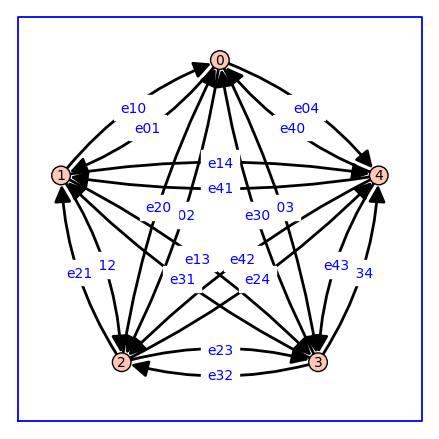

In [1]:
# Construct Wang ring S with indeterminants corresponding to edges of G
way = 2
if way == 1:
    R=PolynomialRing(GF(2),names=['a','b','c','d','e','f','A','B','C','D','E','F'],order='invlex')
    R.inject_variables()
    dG = {0: {1:a, 2:c, 4:f}, 1: {0:A, 2:b}, 2: {0:C, 1:B, 3:d}, 3: {2:D, 4:e}, 4: {3:E, 0:F}} # House graph
    G = DiGraph(dG,weighted=True)
else: # way 2 
    #G = graphs.HouseGraph()
    #G = graphs.PetersenGraph()
    G = graphs.CompleteGraph(5)
    G = G.to_directed()
    edge_list_forward = []
    edge_list_reverse = []
    for edge in G.edges(sort=True):
        if edge[0]<edge[1]:
            edge_list_forward.append('e%s%s'%(edge[0],edge[1]))
            edge_list_reverse.append('e%s%s'%(edge[1],edge[0]))
    #print(edge_list_forward)
    #print(edge_list_reverse)
    R = PolynomialRing(GF(2), edge_list_forward + edge_list_reverse) # over F2
    R.inject_variables()
    for edge in G.edges(sort=True):
        G.set_edge_label(edge[0],edge[1],R('e%s%s'%(edge[0],edge[1])))
G.show(edge_labels=True,figsize=6,graph_border=True)

### code should be autonomous from here

In [2]:
def shorten(t,max=20,prefix=4,suffix=4):
    if len(t.monomials())<=max:
        return str(t)
    else:
        return str(sum(t.monomials()[:prefix])) + '+ ... +' + str(sum(t.monomials()[-suffix:]))

In [3]:
# Construct Wang ring S with indeterminants corresponding to edges of G
ne2 = G.size()/2
I = R.ideal([ R.gen(i)*R.gen(i+ne2) for i in range(ne2) ])
S = R.quotient(I,names=list(R.gens()))
S.inject_variables(verbose=0)
print('S is', S)

S is Quotient of Multivariate Polynomial Ring in e01, e02, e03, e04, e12, e13, e14, e23, e24, e34, e10, e20, e30, e40, e21, e31, e41, e32, e42, e43 over Finite Field of size 2 by the ideal (e01*e10, e02*e20, e03*e30, e04*e40, e12*e21, e13*e31, e14*e41, e23*e32, e24*e42, e34*e43)


In [4]:
# Construct polynomial corresonding to edges adjacent to each vertex
h=[]
for v in G.vertices(sort=True):
    h0 = S(0)
    for u in G.neighbors(v):
        h0 += G.edge_label(v,u)
    h.append(h0)
    print(v,':',h0)

0 : e01 + e02 + e03 + e04
1 : e12 + e13 + e14 + e10
2 : e23 + e24 + e20 + e21
3 : e34 + e30 + e31 + e32
4 : e40 + e41 + e42 + e43


In [5]:
# Calculate products of these polynomials in Wang ring S
hprod = [1]
for v in range(G.order()):
    hprod.append(hprod[-1]*h[v])
    print(v,':',shorten(hprod[-1],10,2,2))

0 : e01 + e02 + e03 + e04
1 : e01*e12 + e02*e12+ ... +e03*e10 + e04*e10
2 : e01*e12*e23 + e02*e12*e23+ ... +e03*e10*e21 + e04*e10*e21
3 : e01*e12*e23*e34 + e02*e12*e23*e34+ ... +e03*e10*e21*e32 + e04*e10*e21*e32
4 : e01*e12*e23*e34*e40 + e02*e12*e23*e34*e40+ ... +e03*e10*e21*e32*e43 + e04*e10*e21*e32*e43


In [6]:
t = hprod[-2]
print('tree polynomial of G has', len(t.monomials()), 'terms (Note: these include cycles not just trees!)\n')
print(shorten(t,20,4,4))

tree polynomial of G has 163 terms (Note: these include cycles not just trees!)

e01*e12*e23*e34 + e02*e12*e23*e34 + e03*e12*e23*e34 + e04*e12*e23*e34+ ... +e04*e14*e21*e32 + e02*e10*e21*e32 + e03*e10*e21*e32 + e04*e10*e21*e32


In [7]:
G0 = copy(G)
G0.weighted(False)
G0.spanning_trees_count() == len(t.monomials())

False

In [8]:
G0.spanning_trees_count()  

125

#### 